<a href="https://colab.research.google.com/github/nicolasero87/Personas-Privadas-Libertad-MusicaSpotify-Nicolas_Rom-n/blob/main/12.%20Spotify_Nicolas_Rom%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONSIGNA
Identificar 1 dataset potencial con las siguientes características:
 i) al menos 2000 filas,
 ii) al menos 15 columnas.
Crearás un notebook que deberá tener en primera instancia un abstract (250/500 palabras) de acuerdo al dataset elegido del desafío “Visualizaciones en Python”. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. Finalmente, deberás generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.
Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
Identificar valores perdidos.
ormato

Entregar un archivo con formato .ipynb. Debe tener el nombre “ProyectoDS_ParteI_+Apellido.ipynb”



####Importacion de librerias y conexion a la carpeta de GitHub

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure

In [2]:
! git clone https://github.com/nicolasero87/PPL_ALTAS.git

Cloning into 'PPL_ALTAS'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 68 (delta 36), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 30.92 MiB | 9.67 MiB/s, done.
Resolving deltas: 100% (36/36), done.


# **DATA BASE 'ATRIBUTOS DE CANCIONES DE SPOTIFY'**
#Abstracto
documento: songAttributes_1999-2019.xlsx**

Spotify Song Attributes

Un conjunto de datos de 2017 canciones con atributos de la API de Spotify.
Cada fila representa una canción.
Hay 16 columnas.
13 de las cuales son atributos de la canción, una columna para el nombre de la canción, una para el artista, y también tiene una columna llamada ‘LABEL’ que determina si al creador de la base de datos le gusta (1) o no le gusta (0) la canción.

Aquí están los 13 atributos de las canciones:

acousticness (acústica)
danceability (bailabilidad)
duration_ms (duración en milisegundos)
energy (energía)
instrumentalness (instrumentalidad)
key (clave/registro)
liveness (vivacidad)
loudness (sonoridad)
mode (modo)
speechiness (hablabilidad)
tempo (tempo)
time_signature (compás)
valence (valencia)

variables potencialmente interesantes:
1. artistas más repetido
2. que clase de canciones prefiere el autor
3 canciones mas bailables  y energeticas
4. division de cantidad de canciones segun el registro


In [3]:
df_2 = pd.read_csv('/content/PPL_ALTAS/songAttributes_1999-2019.csv')

In [4]:
df_2.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
df_2.shape

(2017, 17)

In [30]:
df_2.describe().round(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.0,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00
mean,1008.0,0.19,0.62,246306.20,0.68,0.13,5.34,0.19,-7.09,0.61,0.09,121.60,3.97,0.50,0.51
std,582.4,0.26,0.16,81981.81,0.21,0.27,3.65,0.16,3.76,0.49,0.09,26.69,0.26,0.25,0.50
min,0.0,0.00,0.12,16042.00,0.01,0.00,0.00,0.02,-33.10,0.00,0.02,47.86,1.00,0.03,0.00
25%,504.0,0.01,0.51,200015.00,0.56,0.00,2.00,0.09,-8.39,0.00,0.04,100.19,4.00,0.30,0.00
50%,1008.0,0.06,0.63,229261.00,0.72,0.00,6.00,0.13,-6.25,1.00,0.05,121.43,4.00,0.49,1.00
75%,1512.0,0.26,0.74,270333.00,0.85,0.05,9.00,0.25,-4.75,1.00,0.11,137.85,4.00,0.69,1.00
max,2016.0,1.00,0.98,1004627.00,1.00,0.98,11.00,0.97,-0.31,1.00,0.82,219.33,5.00,0.99,1.00


A partir de esta descrpcion de las variables que componen el data set, podriamos ver algunas caracteristicas salientes: por ejemplo los altos valores en promedio de Danceability (bailable) y Energy (energía) en contraposicion a los bajos valores de acustica (Acousticness) y e instrumentalidad (instrumentalness). ¿será que el autor del data set prefiere canciones más divertidas y bailables por sobre las melódicas y acusticas?

In [ ]:
df_2.describe(include='object')

,song_title,artist
count,2017,2017
unique,1956,1343
top,River,Drake
freq,3,16


In [ ]:
#Identificar valores perdidos.

df_2.isnull().sum()

,0
Unnamed: 0,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0


# Preguntas/hipótesis
interrogantes que surgen de la base de datos:
##1.¿hay algun artista que sobresalga de los restantes?
##2.¿qué clase de musica es la preferida para el autor de la base de datos, considerando las caracteristicas descriptas para cada canción?

#Análisis exploratorio de datos (EDA por sus siglas en inglés)
usaremos gráficos y visualizaciones para explorar y analizar el conjunto de datos del data set Spotify Song Attributes.
El objetivo es explorarlos, investigarlos y aprender usando distintos métodos.

#Objetivo
Analizar el perfil de gusto musical del autor de la base de datos.

#Contexto analitíco
Explorar el data set Spotify Song Attributes mediante la aplicacion de metodos y visualizacion a traves de distintas clases de gráficos que orienten el análisis y permitan la obtención de valiosos insights.

In [10]:
#cuáles son los artistas ordenandolos por cantidad de veces mencionados
artist_counts = df_2['artist'].value_counts()
artist_counts_sorted = artist_counts.sort_values(ascending=False)
print(artist_counts_sorted)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
                   ..
Stan Getz           1
Ray Bryant          1
Duke Ellington      1
John Mayer          1
Bleachers           1
Name: count, Length: 1343, dtype: int64


In [11]:
#serie con los primeros 5 artistas
top_5_artists_series = artist_counts_sorted.head(5)
print(top_5_artists_series)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Name: count, dtype: int64


Este método nos resume cuáles son los artistas Top 5 de la base de datos bajo análisis.

Text(-0.2, 21, 'Important point')

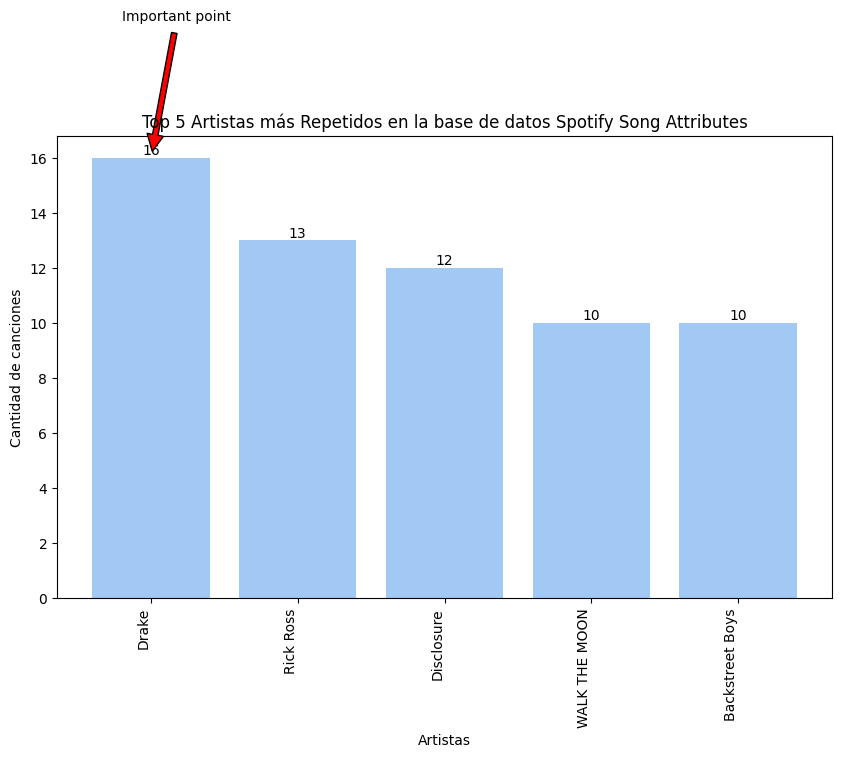

In [26]:
# Extraer los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(artistas, conteos)
plt.xlabel('Artistas')
plt.ylabel('Cantidad de canciones')
plt.title('Top 5 Artistas más Repetidos en la base de datos Spotify Song Attributes')
for i, v in enumerate(conteos):
    plt.text(i, v, str(v), ha='center', va='bottom') #etiquetas con los valores
plt.xticks(rotation=90, ha='right')
x = 1
y = 2
x_offset = 0.5
y_offset = 0.5

# ubicar el indice de la  barra mas alta
highest_bar_index = conteos.argmax()

# ubicar la coordinada x de la  barra mas alta
x = highest_bar_index

# ubicar la coordinada y de la  barra mas alta
y = conteos[highest_bar_index]

# ajustar el ancho
x_offset = -0.2
y_offset = 5

plt.annotate('Important point', xy=(x, y), xytext=(x + x_offset, y + y_offset),
             arrowprops=dict(facecolor='red', shrink=0.05))

Este gráfico es útil para comunicar de manera clara y concisa la frecuencia de los 5 artistas más repetidos en la base de datos "Spotify Song Attributes" y destacar al artista principal. Veamos como es la proporcion entre los cinco artitas mas mencionados en el data set para compararlos entre sí, destacando con la flecha roja el valor de las canciones del artista más mencionado en el data set.



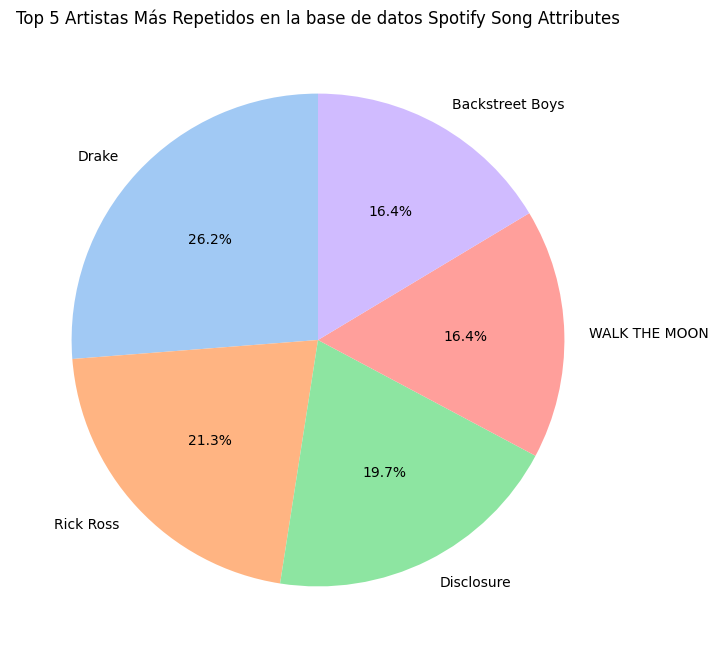

In [19]:
#ver la proporcion entre los 5 artistas mas mencionados en un grafico de torta usando Seaborn

# Extraer los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

#  gráfico de torta
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(conteos, labels=artistas, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Artistas Más Repetidos en la base de datos Spotify Song Attributes')
plt.show()

##Analizaremos al artista 'preferido' del autor del data set, poniendo el foco en las canciones de 'Drake'

In [33]:
#cuáles son las canciones del artista mas mencionado
canciones_drake = df_2[df_2['artist'] == 'Drake']['song_title']
print(canciones_drake)

5                        Sneakin’
6                     Childs Play
37                        Jumpman
117                 Hotline Bling
154                     Big Rings
158                 Know Yourself
168               Wu-Tang Forever
440                     Headlines
589       Started From the Bottom
676     Hold On, We're Going Home
717     Hold On, We're Going Home
779       0 To 100 / The Catch Up
1016             Skepta Interlude
1183                 Passionfruit
1218              Best I Ever Had
1223                    Take Care
Name: song_title, dtype: object


In [34]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Extrae los valores de 'danceability'
danceability_values = canciones_drake['danceability'].tolist()

# Agrega un pequeño valor aleatorio a cada valor de 'danceability'
#danceability_values = np.array(danceability_values) + np.random.rand(len(danceability_values)) * 0.01

# Crea el histograma
plt.hist(danceability_values, bins=20)
plt.xlabel('Danceability')
plt.ylabel('Frecuencia')
plt.title('Histograma de Danceability para canciones del artista Drake')
plt.show()

KeyError: 'danceability'

Analizando el histograma de Danceability de las canciones de Drake se observa  una concentración de valores altos (hacia la derecha del gráfico), de modo que el insigh obtenido es que el artista Drake tiende a producir canciones con un alto grado de bailabilidad.

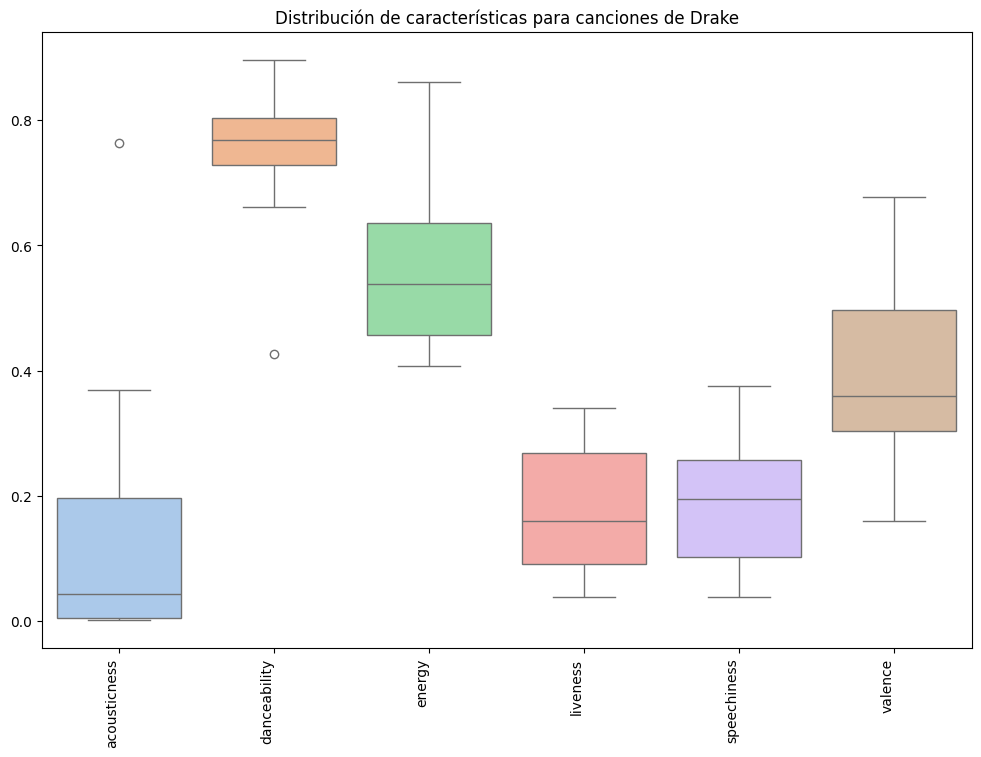

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas deseadas para el gráfico
columnas_deseadas_grafico = ['acousticness', 'danceability', 'energy',
                     'liveness',   'speechiness',   'valence']

# Convierte la lista de Series en un DataFrame, seleccionando solo las columnas deseadas
drake_df = pd.DataFrame(lista_series_drake)[columnas_deseadas_grafico]

# Crea el diagrama de caja
plt.figure(figsize=(12, 8))
sns.boxplot(data=drake_df)
plt.xticks(rotation=90, ha='right')
plt.title('Distribución de características para canciones de Drake')
plt.show()

Insights:
al comparar la distribución de las diferentes características se observa que la principal caracteristica de las canciones de Drake es que son bailables (mediana mas alta y rango pequeño) y en segundo lugar canciones energeticas (mediana alta)
No hay  canciones representadas por puntos fuera de los bigotes que permitan Identificar canciones atípicas
La dispersión de los datos en cada caja  da una idea de la variabilidad en cada característica del estilo musical de Drake. La caractiristica con valores mas bajos es 'acustico'.
en este grafico de cajas se observa la concordancia con la caracteristica 'bailable'(es donde mas se concentran los valores y donde se observan los valores mas altos y menos dispersos)

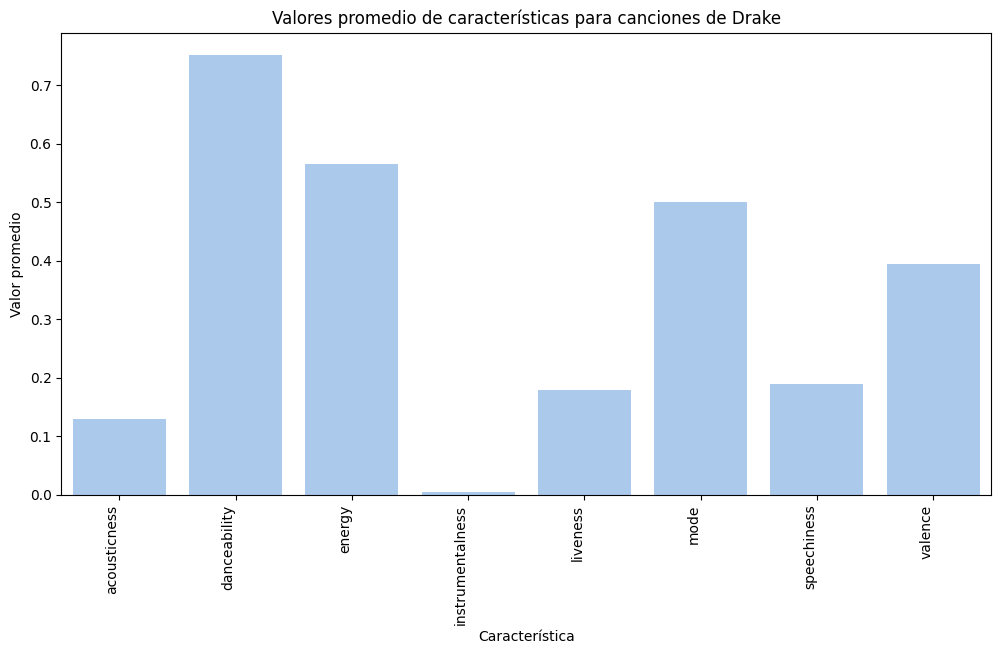

In [ ]:
#distribucion de las caracteristicas de las canciones del artista mas mencionado
drake_songs = df_2[df_2['artist'] == 'Drake']
import seaborn as sns
import matplotlib.pyplot as plt

columnas_deseadas = ['acousticness', 'danceability',  'energy', 'instrumentalness',
                     'liveness',  'mode', 'speechiness',   'valence']

# Calcula el promedio de cada característica
promedios_drake = drake_songs[columnas_deseadas].mean()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=promedios_drake.index, y=promedios_drake.values)
plt.xticks(rotation=90, ha='right')
plt.title('Valores promedio de características para canciones de Drake')
plt.ylabel('Valor promedio')
plt.xlabel('Característica')

plt.show()

en este grafico de barras (con los promedios de los valores de cada caracteristica) se puede interpretar juntamente con los dos graficos anteriores ( de histograma y el de barras). con los tres clases de grafico se infiere que la caracteristica 'bailable', es donde mas se concentran los valores y donde se observan los valores mas altos y menos dispersos.

ahora analizaremos las 16 canciones de Drake de acuerdo a las caracteristicas de 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness'

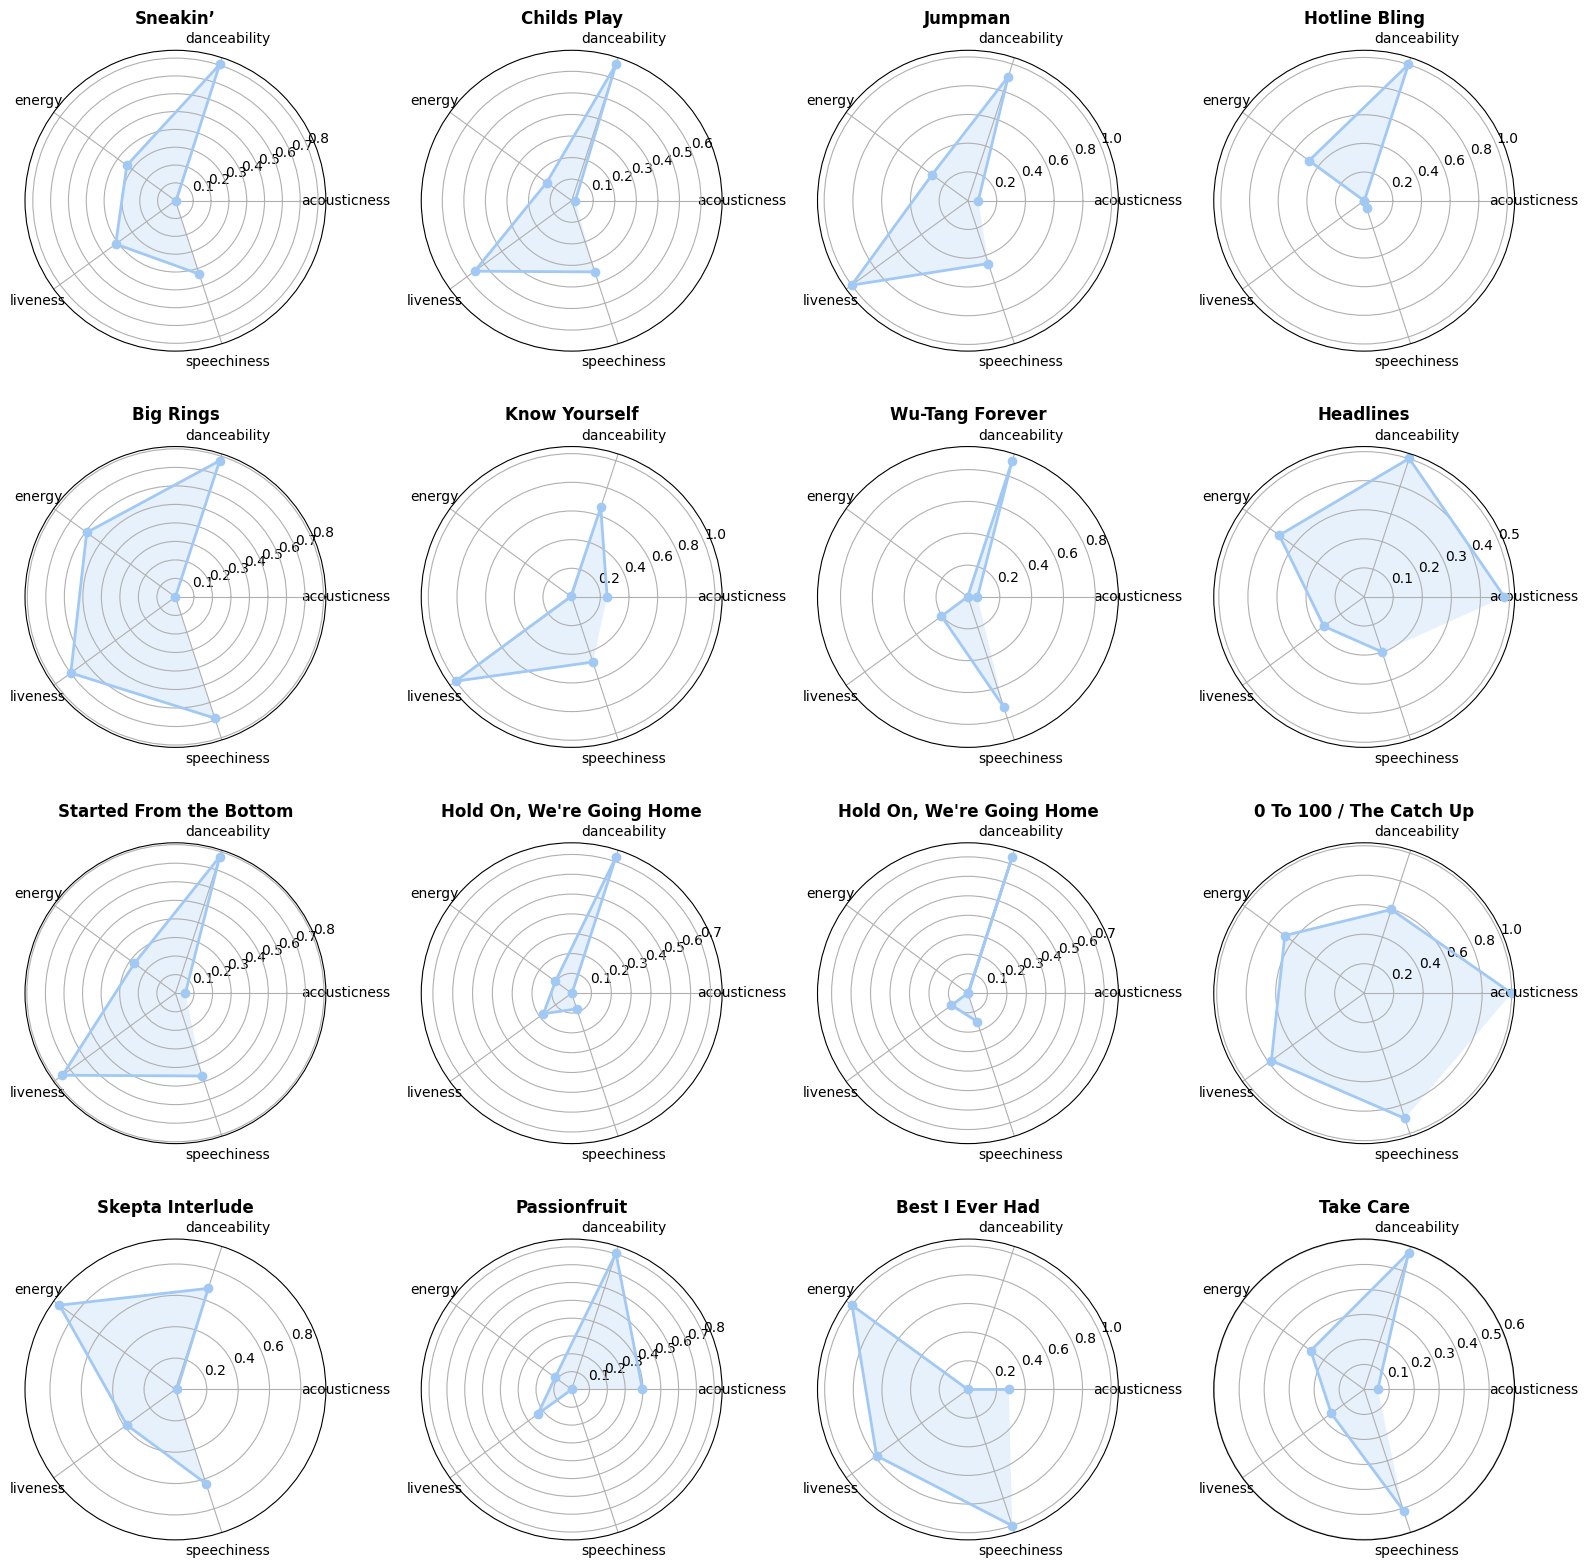

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Selecciona las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Extrae los valores de las características para las canciones de Drake
drake_data = df_2[df_2['artist'] == 'Drake'][columnas_deseadas]

# Normaliza los valores entre 0 y 1
drake_data_norm = (drake_data - drake_data.min()) / (drake_data.max() - drake_data.min())

# Crea los ángulos para el gráfico de araña
angulos = np.linspace(0, 2*np.pi, len(columnas_deseadas), endpoint=False)
angulos = np.concatenate((angulos, [angulos[0]]))  # Cierra el círculo

# Crea una cuadrícula de subplots (4 filas x 4 columnas)
fig, axes = plt.subplots(4, 4, figsize=(16, 16), subplot_kw=dict(polar=True))

# Itera sobre las canciones y crea los gráficos de radar
for i in range(len(drake_data_norm)):
    valores_cancion = drake_data_norm.iloc[i].values.tolist()
    valores_cancion += valores_cancion[:1]  # Cierra el círculo para cada canción

    # Obtén el título de la canción usando el índice
    titulo_cancion = df_2[df_2['artist'] == 'Drake']['song_title'].iloc[i]

    # Calcula la posición del subplot en la cuadrícula
    fila = i // 4
    columna = i % 4

    # Crea el gráfico de radar en el subplot correspondiente
    ax = axes[fila, columna]
    ax.plot(angulos[:-1], valores_cancion[:-1], 'o-', linewidth=2)
    ax.fill(angulos[:-1], valores_cancion[:-1], alpha=0.25)
    ax.set_thetagrids(angulos[:-1] * 180/np.pi, columnas_deseadas)
    ax.set_title(f'{titulo_cancion}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Al visualizar los 16 gráficos de radar de cada canción del artista Drake, se puede obtener informacion sobre:
La variabilidad de su estilo musical:  los gráficos tienen formas muy diferentes entre sí. Esto podría indicar que Drake experimenta con diferentes estilos musicales en sus canciones y donde la unica variable predominante  es 'bailable' ('danceability')
Las características predominantes en su música: la mayoría de las canciones de Drake tienen alta energía y bailabilidad . Podria afirmarse que su música es generalmente enérgica y bailable.
Canciones atípicas: el gráficos que se destaquen del resto por tener una forma o valores muy diferentes es el de la cancion Best I ever had (por ser la unica cancion 'no bailale'. Esta cancion podría representar experimento musical o desviacion de su estilo habitual. Siguiendo el correlato con los analisis realizados mediante los graficos anteriores (de barra e histograma) la caracteristica más observada para las canciones de Drake es 'bailables'.

Teniendo en cuenta que la variable 'bailable' se repite en los analisis efectuados, ahora desearia saber donde se concentran los datos haciendo un histograma para la base de datos bajo analisis. ¿será que al autor de la base de datos le suelen gustar canciones bailables en general? ¿o eso solo sucede con las canciones del grupo Drake -su grupo con mayor cantidad de canciones en la base de datos-?

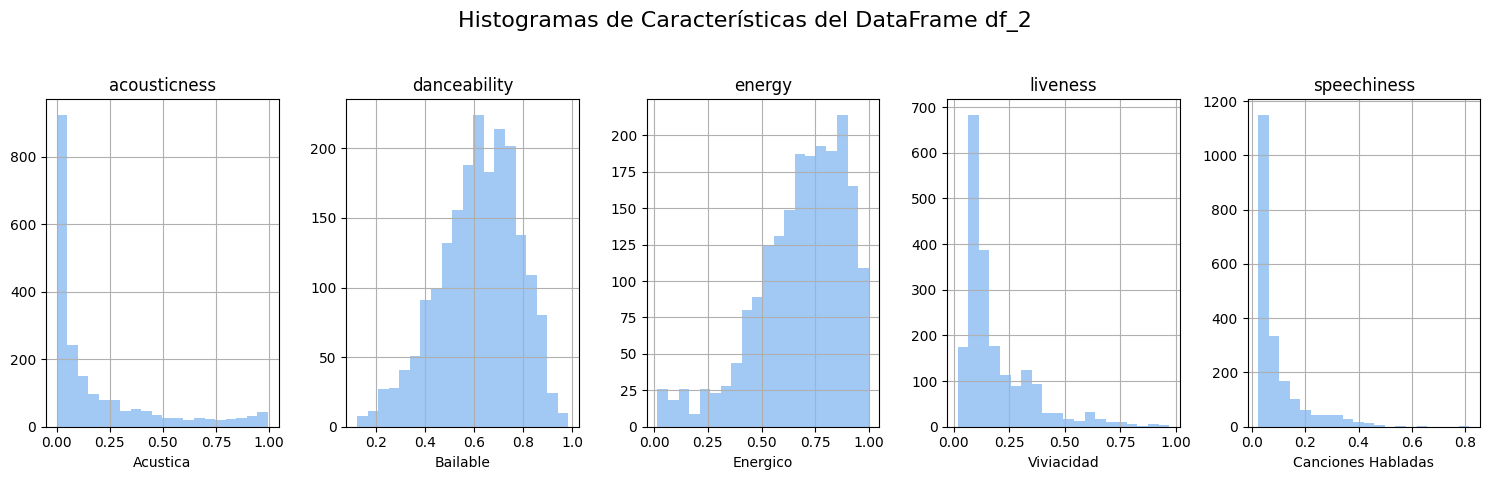

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecciona las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Crea el histograma
fig, axes = plt.subplots(1, len(columnas_deseadas), figsize=(15, 5))  # Crea subplots individuales
df_2[columnas_deseadas].hist(ax=axes, bins=20)

# Nuevos títulos
nuevos_titulos = ['Acustica', 'Bailable', 'Energico', 'Viviacidad', 'Canciones Habladas']

# Reemplaza los títulos de los gráficos
for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel(nuevos_titulos[i])

plt.suptitle('Histogramas de Características del DataFrame df_2', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Se puede inferir que, lo que sucede con las canciones de Drake tambien se replica para la mayoria de las canciones de la base de datos. Es decir que el autor de este data set tiende a preferir canciones bailables y energicas, con bajos valores para canciones acusticas, y habladas.

Veamos ahora si esto mismo sucede respecto de los 5 artistas mas repetidos en la base de datos, que ya habiamos obtenido mas arriba: artistas_top_5 = ['Drake', 'Rick Ross', 'Disclosure', 'WALK THE MOON', 'Backstreet Boys']


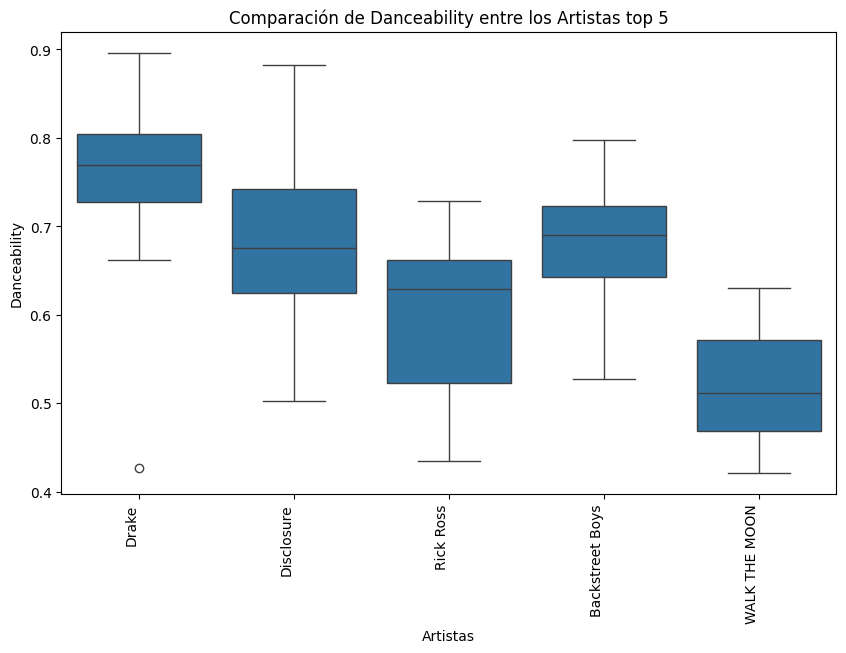

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Artistas más repetidos (top 5)
artistas_top = ['Drake', 'Rick Ross', 'Disclosure', 'WALK THE MOON', 'Backstreet Boys']

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas_top)]

# Crea el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='artist', y='danceability', data=df_filtrado)
plt.xticks(rotation=90, ha='right')
plt.title('Comparación de Danceability entre los Artistas top 5')
plt.xlabel('Artistas')
plt.ylabel('Danceability')
plt.show()

Al comparar la mediana, los cuartiles y los valores atípicos de 'danceability' entre los artistas top 5, se observa variabilidad en el nivel de bailabilidad de sus canciones. Por lo tanto, si bien el autor tiene una tendencia hacia las canciones bailables considerando toda la base de datos, cuando se focaliza en los 5 artitas mas repetidos, la caracteristica bailable varia entre 0.8 (valor maximo para 'Drake') a 0,45 (valor minimo: para 'Walk The Moon').

Veamos el detalle de 'danceability' y 'energy' en un grafico de barras agrupadas para los 5 artistas más repetidos. Esto  permite visualizar la cantidad de canciones, así como los valores promedio de 'danceability' y 'energy' para cada artista.



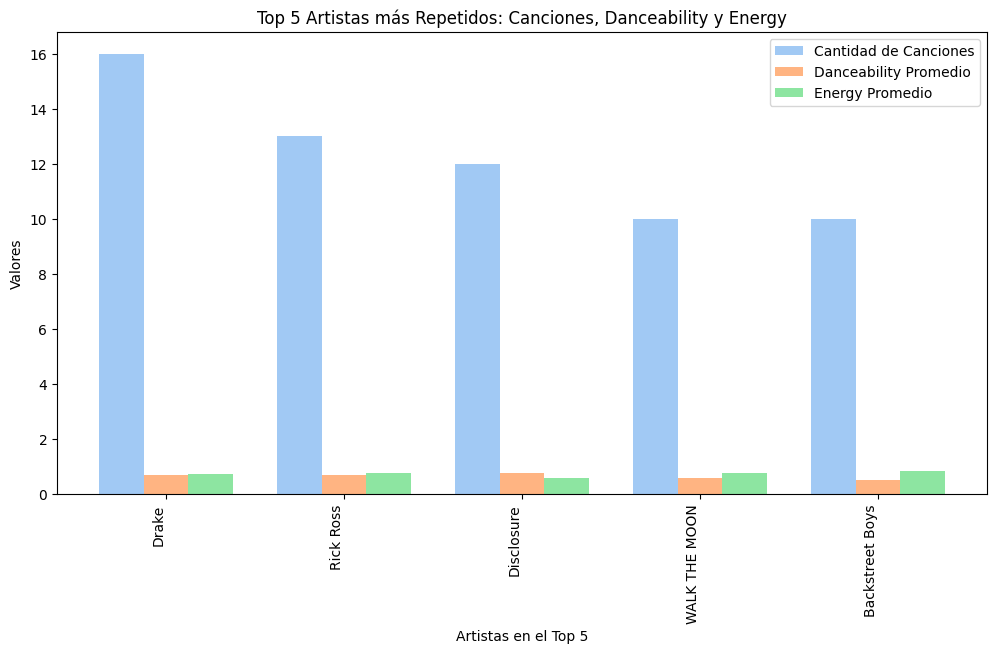

In [ ]:
import numpy as np
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones - ancho_barra, conteos, width=ancho_barra, label='Cantidad de Canciones')
ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=90, ha='right')
ax.set_xlabel('Artistas en el Top 5')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: Canciones, Danceability y Energy')
ax.legend()

# ¿Como influye la variable Tiempo ('tempo') en el data set respecto de la caracteristica 'danceability'?
ya hemos analizado cuales son los artitas favoritos del data set y que la característica distintiva del data set y del artista favorito tiende a ser 'dancecability'.
idaguemos seguidamente si hay relación entre la variable 'danceability' y la duración de las canciones que posee el data set.
primero analizar el promedio de las canciones.
luego un hemograma de dicha variable
y luego la relacion de cardinalidad

In [ ]:
# Descripción de la columna 'duration_ms'
descripcion_duracion = df_2['duration_ms'].describe()
print(descripcion_duracion)

# Descripción de la columna 'tempo'
descripcion_tempo = df_2['tempo'].describe()
print(descripcion_tempo)

count    2.017000e+03
mean     2.463062e+05
std      8.198181e+04
min      1.604200e+04
25%      2.000150e+05
50%      2.292610e+05
75%      2.703330e+05
max      1.004627e+06
Name: duration_ms, dtype: float64
count    2017.000000
mean      121.603272
std        26.685604
min        47.859000
25%       100.189000
50%       121.427000
75%       137.849000
max       219.331000
Name: tempo, dtype: float64


donde se concentran la mayoria de las canciones de la base de datos dentro de 'duracion'?

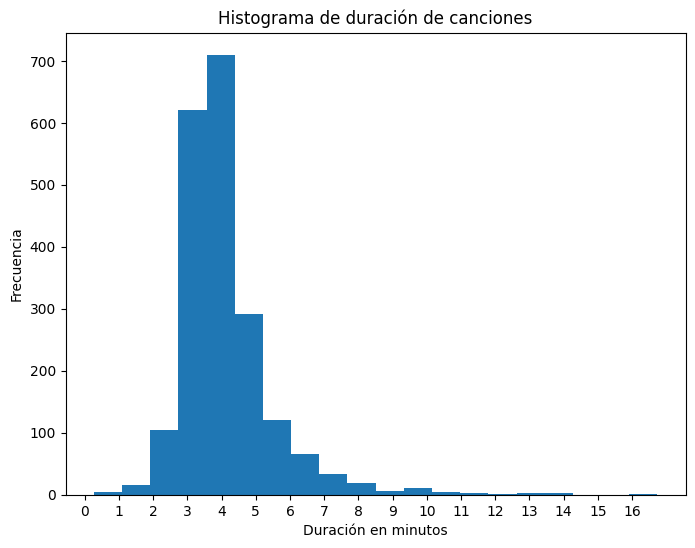

In [ ]:
df_2['duration_min'] = df_2['duration_ms'] / (1000 * 60)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_2['duration_min'], bins=20)  # Puedes ajustar el número de bins según tus necesidades
plt.xlabel('Duración en minutos')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración de canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()


In [ ]:
promedio_duracion_minutos = df_2['duration_min'].mean()
promedio_redondeado = round(promedio_duracion_minutos, 2)
print('El promedio de las canciones del data set es de \033[1m\033[3;35m', promedio_redondeado, '\033[0m minutos.')

El promedio de las canciones del data set es de  4.11  minutos.


Vemos que el resultado del calculo promedio es consecuente con el grafico de histograma. Ahora veamos lo mismo pero mediante un grafico de Cajas

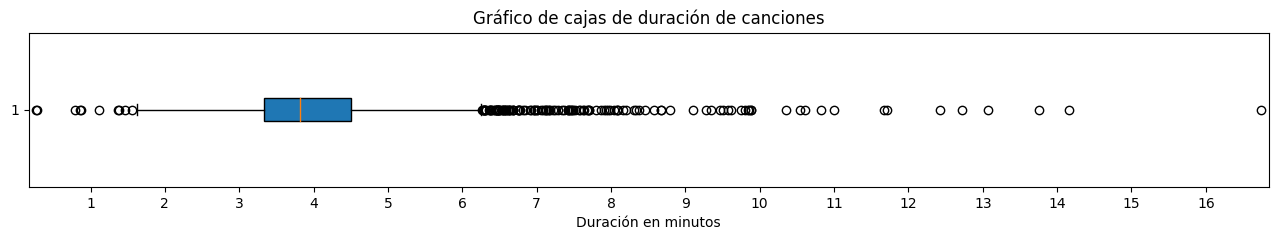

In [ ]:
import matplotlib.pyplot as plt

# Calcular los límites del eje x
min_valor = df_2['duration_min'].min()
max_valor = df_2['duration_min'].max()

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['duration_min'], vert=False, patch_artist=True)
plt.xlabel('Duración en minutos')
plt.title('Gráfico de cajas de duración de canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)


# Ajustar los límites del eje x
plt.xlim(min_valor - 0.1, max_valor + 0.1)  # Ajusta los valores -0.5 y +0.5 según sea necesario

plt.show()


Con este gráfico de cajas de la duración de las canciones, se puede  analizar varios aspectos de la distribución de los datos del data set:

1. Mediana: La línea dentro de la caja representa la mediana, es decir, el valor que divide la distribución en dos mitades iguales. Demuestra dónde se encuentra la duración típica de las canciones en el dataset. (cercana a los 4 minutos)

2. Cuartiles: Los bordes de la caja representan el primer y tercer cuartil (Q1 y Q3). Estos valores dividen la distribución en cuatro partes iguales. La distancia entre Q1 y Q3 (el rango intercuartil)  indica la dispersión de la mitad central de los datos.

3. Rango: Las líneas que se extienden desde la caja (bigotes) muestran el rango de los datos, excluyendo posibles valores atípicos. Se puede observar la duración mínima y máxima de las canciones dentro de este rango.

4. Valores atípicos: Los puntos individuales fuera de los bigotes representan posibles valores atípicos, es decir, canciones con duraciones inusualmente largas o cortas en comparación con el resto de la distribución.

Veamos ahora dos cosas:
1. como quedaria representado meditante el metodo de puntuacion z el grafico de cajas.

2. como quedaria representado en un grafico de dispersion de puntos respecto de la variable 'danceability', pero p

##Diagrama de caja de puntuaciones Z

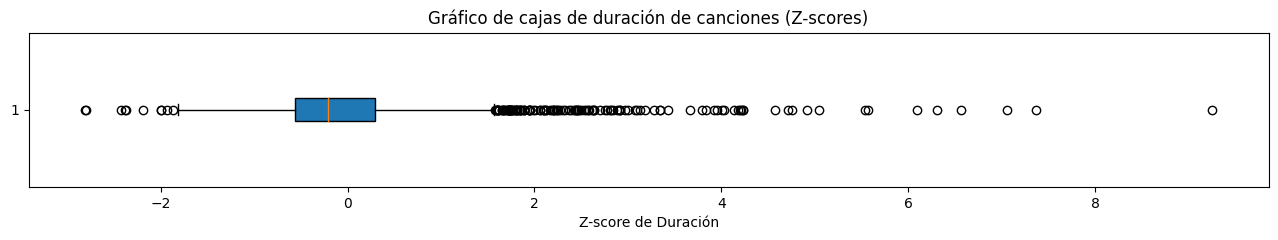

In [ ]:
from scipy import stats
df_2['z_score_duration'] = stats.zscore(df_2['duration_min'])

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['z_score_duration'], vert=False, patch_artist=True)
plt.xlabel('Z-score de Duración')
plt.title('Gráfico de cajas de duración de canciones (Z-scores)')
plt.show()

Al calcular las puntuaciones z, se transforman los valores de 'duration_min' en una distribución normal estándar con una media de 0 y una desviación estándar de 1.

Esto te permite identificar valores atípicos en función de cuántas desviaciones estándar están lejos de la media.

El diagrama de caja de puntuaciones z representar visualmente la distribución de estos valores estandarizados, lo que facilita la identificación de posibles valores atípicos. En este caso los que estan por debajo de -2 y los que se hallan mas alla de 4.

##Gráfico de dispersión: Duración vs. Danceability




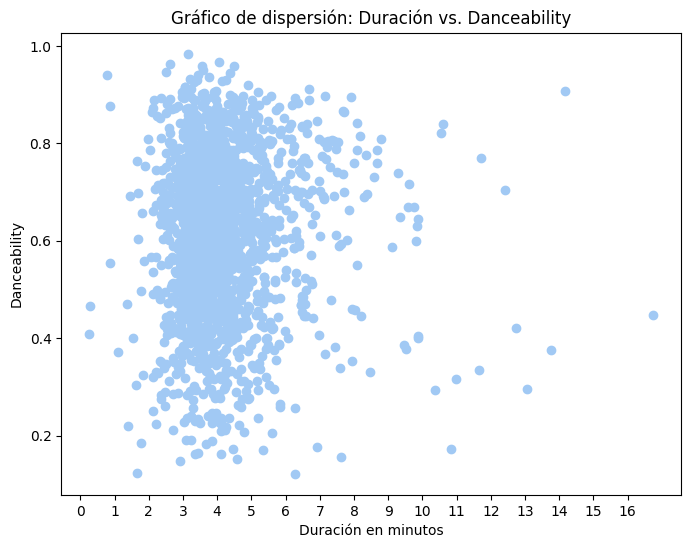

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['danceability'])
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración vs. Danceability')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos ahora como quedaria representado en un grafico de dispersion de puntos respecto de la variable 'Energy'

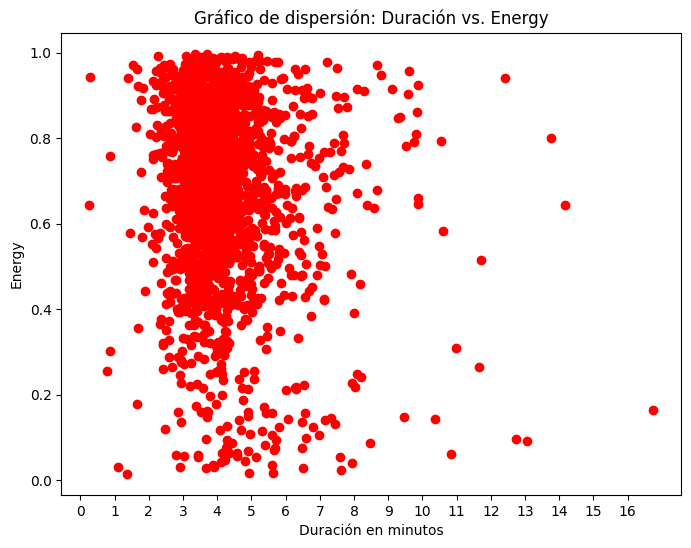

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['energy'], color='red')
plt.xlabel('Duración en minutos')
plt.ylabel('Energy')
plt.title('Gráfico de dispersión: Duración vs. Energy')

# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos los dos graficos juntos usando subplots en Matplotlib. Lo que permitirá crear dos gráficos en una misma figura. Esto permite una comparación visual directa entre las dos relaciones.

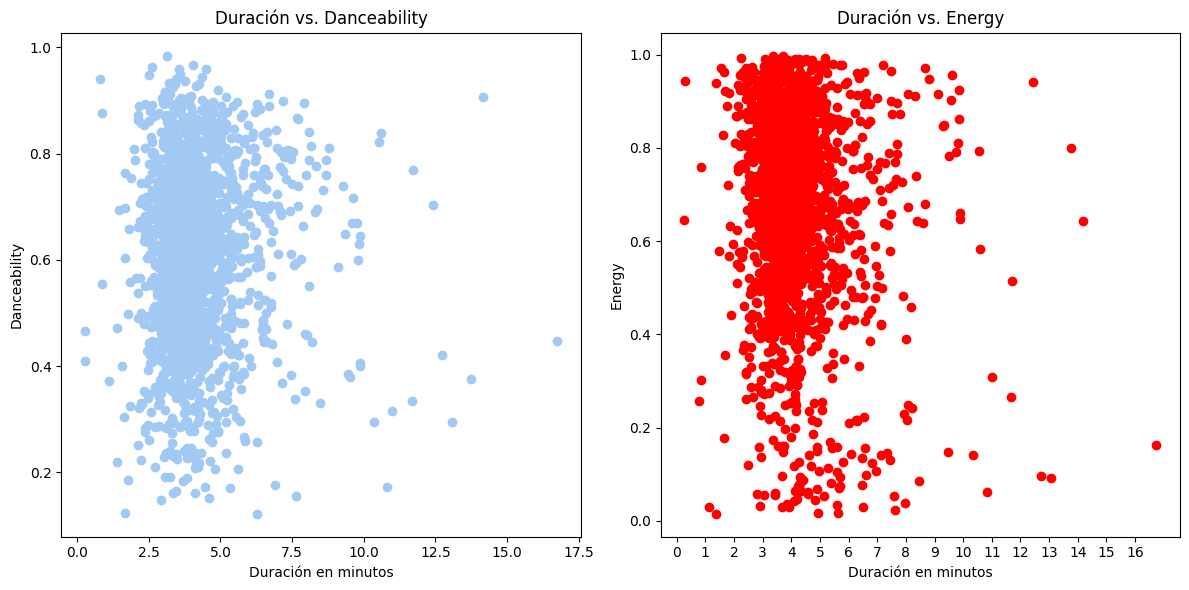

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Crea dos subplots en una fila

# Gráfico 1: Duración vs. Danceability
ax1.scatter(df_2['duration_min'], df_2['danceability'])
ax1.set_xlabel('Duración en minutos')
ax1.set_ylabel('Danceability')
ax1.set_title('Duración vs. Danceability')


# Aplica las marcas al eje x
plt.xticks(marcas_x)
# Gráfico 2: Duración vs. Energy
ax2.scatter(df_2['duration_min'], df_2['energy'], color='red')
ax2.set_xlabel('Duración en minutos')
ax2.set_ylabel('Energy')
ax2.set_title('Duración vs. Energy')

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

Ahora veamos cuál es la influencia de la variable 'energy' en la variable 'danceability' dentro de un solo gráfico (donde la relación entre la duración y 'danceability' se representa mediante la posición de los puntos, y la variable 'energy' se mapea al color de los puntos). Esto permite visualizar la influencia de 'energy' en la relación entre duración y 'danceability' en un solo gráfico. Veamos:

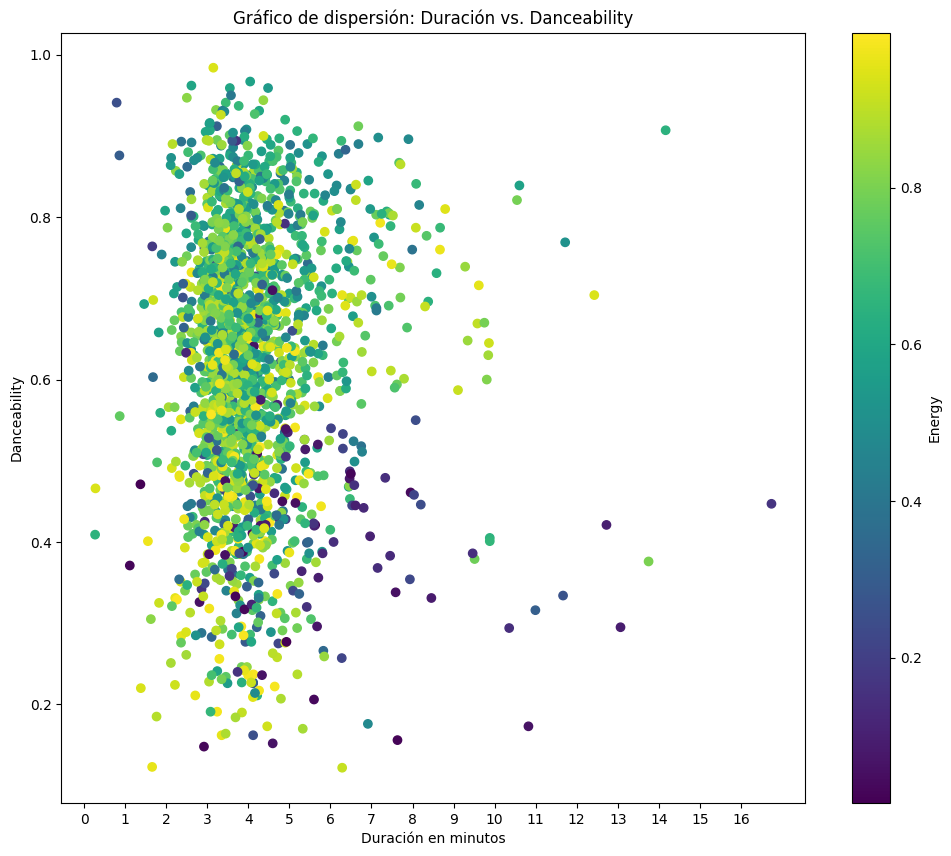

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_2['duration_min'], df_2['danceability'], c=df_2['energy'], cmap='viridis')
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración vs. Danceability')
plt.colorbar(label='Energy')  # Agrega una barra de colores para mostrar la escala de 'energy'
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1  # Suma 1 para incluir el máximo en el rango

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

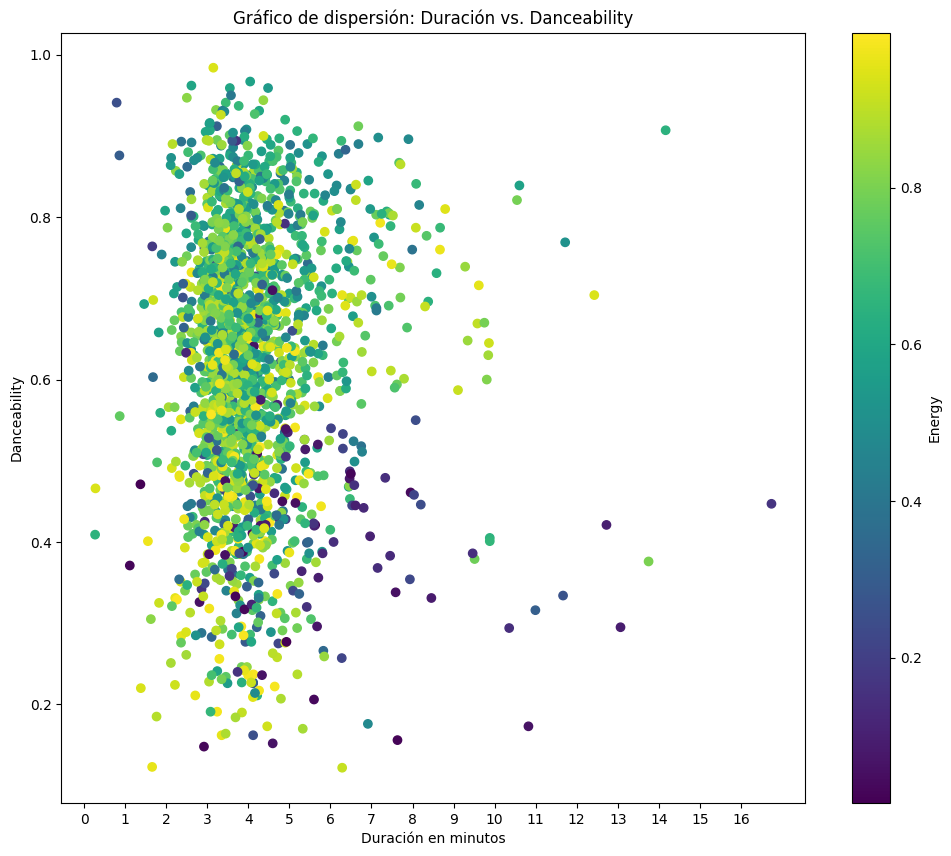

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_2['duration_min'], df_2['danceability'], c=df_2['energy'], cmap='viridis')
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración vs. Danceability')
plt.colorbar(label='Energy')  # Agrega una barra de colores para mostrar la escala de 'energy'# Define las nuevas posiciones de las marcas en el eje x
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1  # Suma 1 para incluir el máximo en el rango

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Aqui podemos observar que la mayoria de las canciones con altos niveles de danceability tienen una duracion semejante al promedio de las canciones del data set (3,75 / 4 Min.). Y que el valor 'energy' que más influye se encuentra entre 0,6 y 0,8.

#EDA EXPLORATORY DATA ANALYSIS (ETA)
1. Atributos distinguidos  (artitas mas mencionados, Top 5)
2. Analisis Univariados (caracteristicas de las canciones del artista mas mencionado y de la variable tiempo)
3. Analisis Bi/Multi Variados (relacion entre las variables tiempo con 'danceability' y 'energy')
4. Detectar valores aberrantes y datos peridos
5. Detectar valores outliers
6. Realizar Engineering

A fines de empezar a hacer un analisis exploratorio de la base de datos 'Atributos de las canciones de Spotify' debemos hacer una matriz de correlacion con los valores numericos seleccionando las siguientes columnas: 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness','mode', 'speechiness', 'valence', y 'target'.

In [ ]:
# Select desired columns
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence', 'target']]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Print the correlation matrix
print(correlation_matrix)

                  acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.179894     0.071536 -0.646319   
danceability         -0.179894      1.000000     0.004695  0.038557   
duration_ms           0.071536      0.004695     1.000000 -0.144473   
energy               -0.646319      0.038557    -0.144473  1.000000   
instrumentalness      0.144397     -0.130561     0.305403 -0.122890   
key                  -0.081037      0.022325     0.023570  0.072886   
liveness             -0.117126     -0.132044     0.023203  0.217435   
loudness             -0.562021      0.104362    -0.273798  0.762177   
mode                  0.068028     -0.047867    -0.074806 -0.070263   
speechiness          -0.099893      0.142661    -0.079562  0.093102   
valence              -0.152227      0.442061    -0.120030  0.278383   
target               -0.129627      0.176706     0.146749  0.039688   

                  instrumentalness       key  liveness  loudness      mode  

y ahora es conveniente ver esta matriz de correlacion en un heatmap:

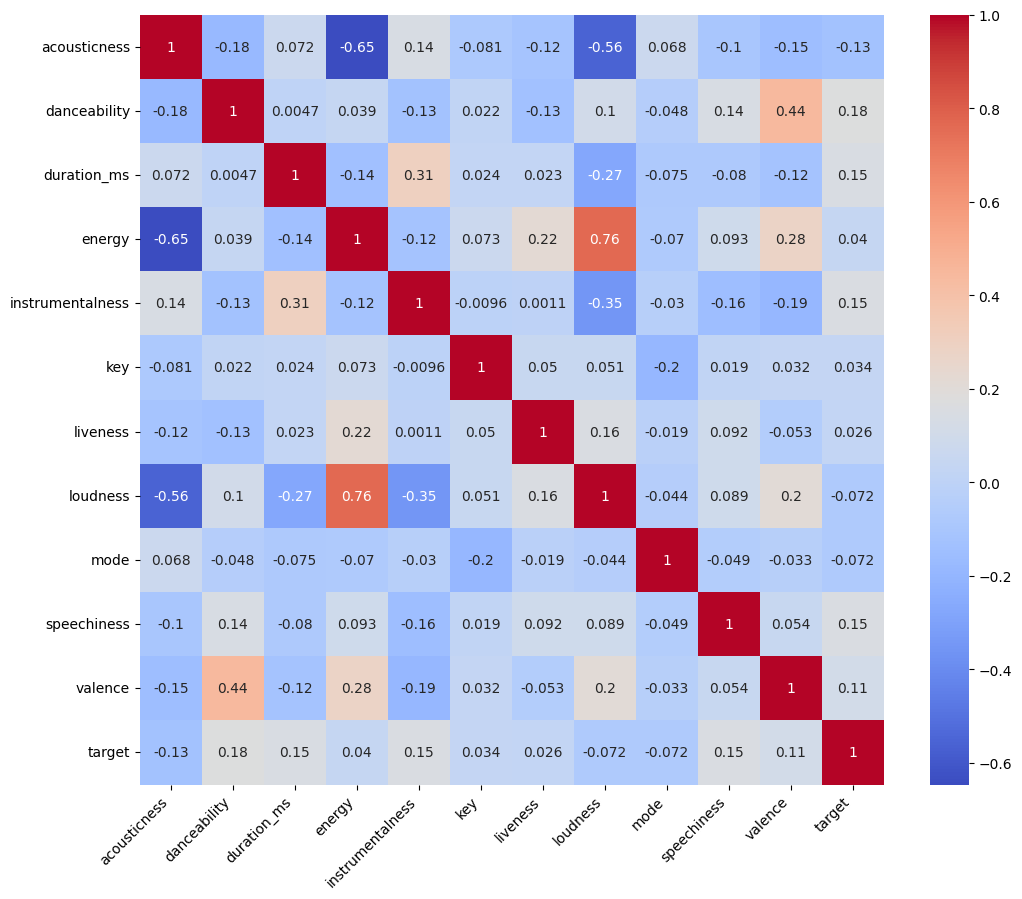

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the size of the heatmap.
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Mediante este mapa de calor podemos:

Comparar variables: se puede identificar relaciones entre variables: por ejemplo la relacion positiva entre Loudness y Energy.

Puntos de interés: se obreseva un valor muy alto (rojo intenso) que indicaría una fuerte correlación positiva entre las variables (loudness y energy), mientras que un valor muy bajo (azul intenso) indicaría una fuerte correlación negativa entre energy y acousticness.

En resumen, podria focalizar el estudio en la caracteristica energy y guiar el análisis teniendo en cuenta esta variable.

#Preguntas de interés.
## ¿Podemos crear un modelo que pueda predecir el gusto musical del autor del data set?
Planteo: Utilizar determinados rangos de categorias específicas. para saber que probabilidades hay de que al autor del data set le guste las canciones comprendidas en esos rangos.

#Hipotesis
##¿La variable 'loudness' va a influir en las categorías 'energy' (correlacion positiva) e 'acousticness' (correlacion negativa)?

#one hot encoding

Cuales son las variables categoricas del data set?

In [ ]:
# Filtra las columnas con tipo de datos 'object' (generalmente categóricas)
categorical_columns = df_2.select_dtypes(include=['object']).columns

# Imprime las columnas categóricas
print(categorical_columns)


Index(['song_title', 'artist'], dtype='object')


cuantos valores unicos poseen las siguientes columnas?

In [ ]:
# Imprime la cardinalidad de cada columna categórica
print('La cardinalidad para titulo de cancion es de ', df_2['song_title'].nunique())
print('La cardinalidad para Artista es de ',df_2['artist'].nunique())
print('La cardinalidad para Key de cancion es de ',df_2['key'].nunique())
print('La cardinalidad para Modo de cancion es de ',df_2['mode'].nunique())
print('La cardinalidad para Time Signature de cancion es de ',df_2['time_signature'].nunique())
print('La cardinalidad para Target de cancion es de ',df_2['target'].nunique())



La cardinalidad para titulo de cancion es de  1956
La cardinalidad para Artista es de  1343
La cardinalidad para Key de cancion es de  12
La cardinalidad para Modo de cancion es de  2
La cardinalidad para Time Signature de cancion es de  4
La cardinalidad para Target de cancion es de  2


In [ ]:
import pandas as pd

# Realiza One-Hot Encoding en las columnas especificadas
df_encoded = pd.get_dummies(df_2, columns=['key', 'mode', 'time_signature', 'target'])

# Imprime el DataFrame codificado (opcional)
print(df_encoded.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.021900    0.1650    -8.795       0.4310  150.062    0.286   
1          0.006110    0.1370   -10.401       0.0794  160.083    0.588   
2          0.000234    0.1590    -7.148       0.2890   75.044    0.173   
3          0.510000    0.0922   -15.236       0.0261   86.468    0.230   
4          0.512000    0.4390   -11.648       0.0694  174.004    0.904   

       song_title            artist  key_0  key_1  key_2  key_3  key_4  key_5  \
0        Mask Off            Future  False  False   True  False  False  False

In [ ]:
# Imprime la forma del DataFrame codificado
print(df_encoded.shape)

(2017, 33)


El resultado es muy extenso  porque la cardinalidad es muy elevada. Probemos con menor cantidad de opciones: registro (key) y Target

In [ ]:
import pandas as pd

# Realiza One-Hot Encoding en las columnas especificadas
df_encoded = pd.get_dummies(df_2, columns=['key', 'target'])

# Imprime el DataFrame codificado (opcional)
print(df_encoded.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence      song_title            artist  key_0  key_1  \
0             4.0    0.286        Mask Off            Future  False  False   
1             4.0   

In [ ]:
# Imprime la forma del DataFrame codificado
print(df_encoded.shape)

(2017, 29)


In [ ]:
import pandas as pd

# Realiza One-Hot Encoding en las columnas especificadas
df_encoded = pd.get_dummies(df_2, columns=[ 'target'])

# Imprime el DataFrame codificado (opcional)
print(df_encoded.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence      song_title            artist  target_0  \
0             4.0    0.286        Mask Off            Future     False  

In [ ]:
# Imprime la forma del DataFrame codificado
print(df_encoded.shape)

(2017, 18)


In [ ]:
import pandas as pd

# Realiza One-Hot Encoding en las columnas especificadas
df_encoded = pd.get_dummies(df_2, columns=['key'])

# Imprime el DataFrame codificado (opcional)
print(df_encoded.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  key_0  \
0             4.0    0.286       1        Mask Off            Future  False   
1             4.0 

In [ ]:
# Imprime la forma del DataFrame codificado
print(df_encoded.shape)

(2017, 28)


de las 3 opciones, la mas conveniente para realizar un one hot encoding por tener un shape mas acotado es la variable 'Target'

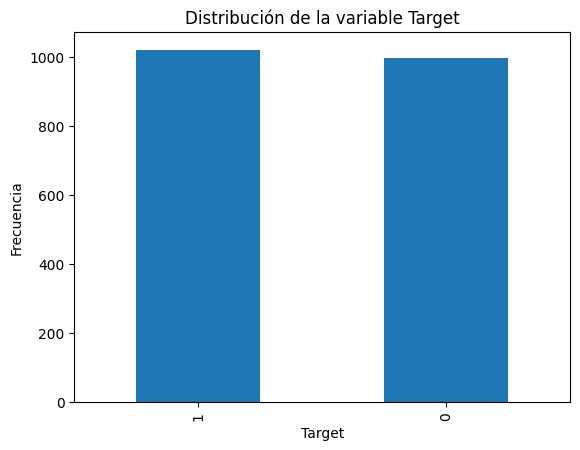

In [ ]:
import matplotlib.pyplot as plt

df_2['target'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable Target')
plt.xlabel('Target')
plt.ylabel('Frecuencia')
plt.show()

##Reemplazo de 1 y 0 por ME GUSTA y NO me gusta

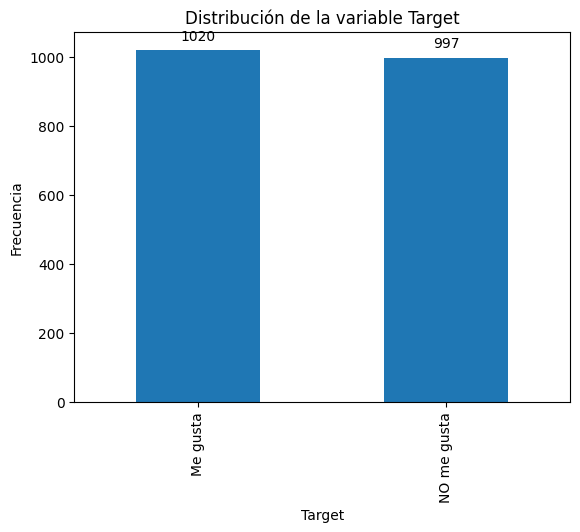

In [ ]:
import matplotlib.pyplot as plt
df_2['target'] = df_2['target'].replace({1: 'Me gusta', 0: 'NO me gusta'})

ax = df_2['target'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable Target')
plt.xlabel('Target')
plt.ylabel('Frecuencia')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

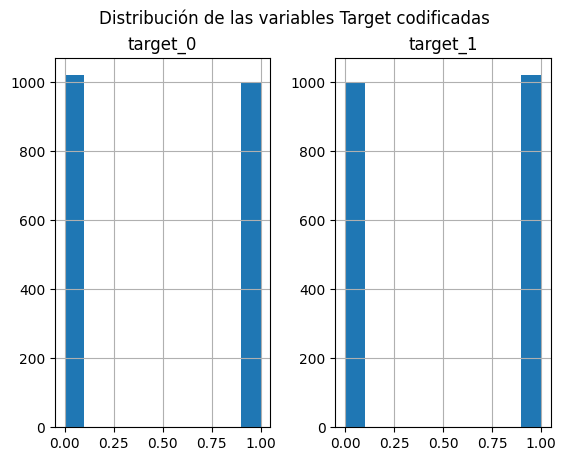

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (código para crear df_encoded)

# Convierte las columnas a tipo numérico
df_encoded['target_0'] = df_encoded['target_0'].astype(int)
df_encoded['target_1'] = df_encoded['target_1'].astype(int)

# Grafica el histograma de las columnas codificadas
df_encoded[['target_0', 'target_1']].hist()
plt.suptitle('Distribución de las variables Target codificadas')
plt.show()

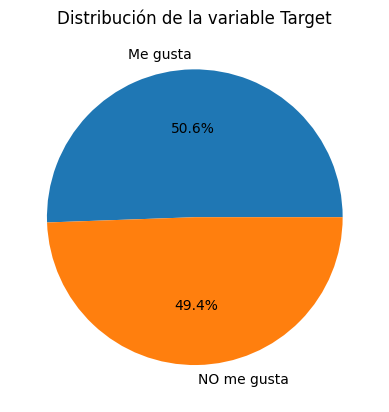

In [ ]:
import matplotlib.pyplot as plt

df_2['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de la variable Target')
plt.ylabel('')  # Quita la etiqueta del eje y
plt.show()

##mostrar la matriz de correlacion de cada variablre con Target 1. hasta aqui llegue con la version 8 a las 15. hs



In [ ]:
# Suponiendo que la columna que contiene "Mask Off" se llama "nombre_cancion"
df_2["song_title"] = df_2["song_title"].astype(float)

ValueError: could not convert string to float: 'Mask Off'

In [ ]:
import pandas as pd
import pandas as pd

# Realiza One-Hot Encoding en la columna 'target', creando ambas columnas 'target_0' y 'target_1'
df_encoded = pd.get_dummies(df_2, columns=['target'], drop_first=False)

# Imprime el DataFrame codificado (opcional)
print(df_encoded.head())

# Calcula la matriz de correlación
correlation_matrix = df_encoded.corr()

# Selecciona la columna 'target_1'
target_1_correlations = correlation_matrix['target_1']

# Imprime las correlaciones con 'target_1'
#print(target_1_correlations)

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence      song_title            artist  target_0  \
0             4.0    0.286        Mask Off            Future     False  

ValueError: could not convert string to float: 'Mask Off'

In [ ]:
import pandas as pd

# Identifica las variables categóricas
categorical_cols = df_2.select_dtypes(include=['object']).columns

# Evalúa la cardinalidad de cada variable categórica
for col in categorical_cols:
    print(f"Cardinalidad de {col}: {df_2[col].nunique()}")

# Realiza el one-hot encoding para variables con baja cardinalidad (por ejemplo, menos de 10 valores únicos)
#low_cardinality_cols = [col for col in categorical_cols if df_2[col].nunique() < 10]
#df_encoded = pd.get_dummies(df_2, columns=low_cardinality_cols)



Cardinalidad de song_title: 1956
Cardinalidad de artist: 1343


In [ ]:
import pandas as pd

# Identifica las variables categóricas
categorical_cols = df_2.select_dtypes(include=['object']).columns

# Evalúa la cardinalidad de cada variable categórica
for col in categorical_cols:
    print(f"Cardinalidad de {col}: {df_2[col].nunique()}")

# Realiza el one-hot encoding para variables con baja cardinalidad (por ejemplo, menos de 10 valores únicos)
low_cardinality_cols = [col for col in categorical_cols if df_2[col].nunique() < 10]
df_encoded = pd.get_dummies(df_2, columns=low_cardinality_cols)

# Para variables con alta cardinalidad, considera otras técnicas de codificación (por ejemplo, target encoding o embeddings)
# ...

Cardinalidad de song_title: 1956
Cardinalidad de artist: 1343


#no entiendo para que sirve el one hot encondig de las variables (luego de haber borrado song title y artits porque tienen alta cartinalidad)

In [ ]:
# Elimina las columnas 'song_title' y 'artist'
df_sin_titulo_artista = df_2.drop(['song_title', 'artist'], axis=1)

# Identifica las variables categóricas restantes
categorical_cols = df_sin_titulo_artista.select_dtypes(include=['object']).columns

# Realiza el one-hot encoding para las variables categóricas restantes
df_encoded = pd.get_dummies(df_sin_titulo_artista, columns=categorical_cols)
df_encoded.head()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [ ]:
matriz_correlacion = df_encoded.corr()

print(matriz_correlacion)

                  Unnamed: 0  acousticness  danceability  duration_ms  \
Unnamed: 0          1.000000      0.133055     -0.139615    -0.104185   
acousticness        0.133055      1.000000     -0.179894     0.071536   
danceability       -0.139615     -0.179894      1.000000     0.004695   
duration_ms        -0.104185      0.071536      0.004695     1.000000   
energy             -0.039880     -0.646319      0.038557    -0.144473   
instrumentalness   -0.104641      0.144397     -0.130561     0.305403   
key                -0.035611     -0.081037      0.022325     0.023570   
liveness           -0.039962     -0.117126     -0.132044     0.023203   
loudness            0.021935     -0.562021      0.104362    -0.273798   
mode                0.060639      0.068028     -0.047867    -0.074806   
speechiness        -0.135362     -0.099893      0.142661    -0.079562   
tempo              -0.027890     -0.127596     -0.143538    -0.076469   
time_signature     -0.053235     -0.190353      0.1

In [ ]:
# Elimina las filas con valores faltantes
df_sin_faltantes = df_encoded.dropna()

print(df_sin_faltantes.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target  
0             4.0    0.286       1  
1             4.0    0.588       1  
2             4.0    0.173       1 

In [ ]:
#eliminar las columnas con valores faltantes
df_sin_faltantes_columnas = df_encoded.dropna(axis=1)

print(df_sin_faltantes_columnas.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target  
0             4.0    0.286       1  
1             4.0    0.588       1  
2             4.0    0.173       1 

#p value

In [ ]:
import pandas as pd
from scipy import stats

# Separate 'key' values based on 'target'
key_target_0 = df_2[df_2['target'] == 0]['key']
key_target_1 = df_2[df_2['target'] == 1]['key']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(key_target_0, key_target_1, equal_var=False)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation of p-value
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Existe una diferencia significativa entre  'key' y target.")
else:
    print("No podemos rechazar la hipótesis nula. No existe una diferencia significativa en key entre los target 1 y 0. ")

T-statistic: -1.5090298091786953
P-value: 0.13144795897480893
No podemos rechazar la hipótesis nula. No existe una diferencia significativa en key entre los target 1 y 0. 


##INSIGHT
Here's an explanation of the t-test results and the insights you can gain:

T-statistic: -1.5090298091786953

This value measures the difference between the means of the two groups (songs with target 0 and songs with target 1) in terms of the 'key' variable, relative to the variability within each group.
The negative sign indicates that the mean 'key' value for the target 0 group is slightly lower than the mean for the target 1 group. However, the magnitude of the t-statistic is not very large.
P-value: 0.13144795897480893

This value represents the probability of observing a difference in 'key' between the two target groups as extreme as the one you found (or even more extreme), assuming that there is actually no difference in the population.
In this case, the p-value is relatively high (greater than the common significance level of 0.05).
Fail to reject null hypothesis: There is no significant difference in 'key' between the two target groups.

This conclusion means that, based on the data you have, there is not enough evidence to say that the 'key' of songs is significantly different between the two target groups.
In other words, the observed difference in mean 'key' values could likely be due to random chance rather than a true underlying difference.
Insight:

The main insight you gain is that the musical key doesn't seem to be a strong factor in determining the 'target' variable in your dataset. This suggests that other features might be more important predictors of the target.

Further Considerations:

Effect Size: While the t-test indicates no significant difference, it might be helpful to consider the effect size (the magnitude of the difference between the groups) to see if there is a practically meaningful difference, even if it's not statistically significant.
Other Variables: Explore the relationship between other variables and the 'target' to identify potential predictors.
Assumptions: Remember that the t-test relies on certain assumptions (e.g., normality of data within each group). If these assumptions are violated, the results might not be reliable.
By combining statistical analysis with domain knowledge, you can gain a deeper understanding of your data and make informed decisions.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Divide el dataframe en dos grupos basados en el valor de target
grupo_0 = df_encoded[df_encoded['target'] == 0]['danceability']
grupo_1 = df_encoded[df_encoded['target'] == 1]['danceability']

# Realiza el t-test independiente
t_statistic, p_value = ttest_ind(grupo_0, grupo_1)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -8.058923078730047
P-value: 1.3051748098692587e-15


Este código primero crea dos series de Pandas, grupo_0 y grupo_1, que contienen los valores de 'danceability' para las filas donde el target es 0 y 1, respectivamente. Luego, aplica la función ttest_ind para realizar el t-test independiente y obtener el t-statistic y el p-value.

El t-statistic mide la diferencia entre las medias de los dos grupos, mientras que el p-value indica la probabilidad de observar una diferencia tan grande o mayor si no hubiera una diferencia real entre las medias de las poblaciones.

Si el p-value es menor que un nivel de significancia predefinido (por ejemplo, 0.05), puedes rechazar la hipótesis nula de que no hay diferencia entre las medias de los dos grupos y concluir que hay una diferencia significativa en 'danceability' entre las canciones con target 0 y 1.

#insight obtenido:
 Los resultados del t-test que obtuviste indican lo siguiente:

T-statistic: -8.058923078730047: Este valor negativo indica que la media de 'danceability' para las canciones con target 0 es menor que la media de 'danceability' para las canciones con target 1. La magnitud del valor (8.05) sugiere una diferencia considerable entre las medias.

P-value: 1.3051748098692587e-15: Este valor extremadamente pequeño (prácticamente cero) indica que es muy poco probable observar una diferencia tan grande o mayor entre las medias de 'danceability' si no hubiera una diferencia real entre las poblaciones de canciones con target 0 y 1.

En otras palabras, los resultados del t-test sugieren fuertemente que hay una diferencia significativa en la característica 'danceability' entre las canciones con target 0 y 1. La diferencia es estadísticamente significativa, lo que significa que es muy poco probable que sea debida al azar.

Interpretación en el contexto de tu análisis:

La interpretación específica de estos resultados dependerá del significado de la variable target en tu dataset.
#Sin embargo, en general, puedes concluir que las canciones con target 1 tienden a tener un valor de 'danceability' más alto que las canciones con target 0.

Recuerda que el t-test solo evalúa la diferencia en las medias. Para una comprensión más completa de la relación entre 'danceability' y el target, podrías considerar visualizar la distribución de 'danceability' para cada grupo (por ejemplo, con histogramas o diagramas de caja) y explorar otras medidas estadísticas como la desviación estándar.

#bokeh

In [ ]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

# Divide el dataframe en dos grupos basados en el valor de target
grupo_0 = df_encoded[df_encoded['target'] == 0]['danceability']
grupo_1 = df_encoded[df_encoded['target'] == 1]['danceability']

# Crea un ColumnDataSource para cada grupo
source_0 = ColumnDataSource(data=dict(danceability=grupo_0))
source_1 = ColumnDataSource(data=dict(danceability=grupo_1))

# Configura la salida para mostrar el gráfico en el notebook
output_notebook()

# Crea la figura
p = figure(title="Distribución de Danceability por Target", x_axis_label='Danceability', y_axis_label='Frecuencia')

# Crea los histogramas
hist_0, edges_0 = np.histogram(grupo_0, bins=20)
p.quad(top=hist_0, bottom=0, left=edges_0[:-1], right=edges_0[1:], fill_color="blue", line_color="white", alpha=0.5, legend_label="Target 0")

hist_1, edges_1 = np.histogram(grupo_1, bins=20)
p.quad(top=hist_1, bottom=0, left=edges_1[:-1], right=edges_1[1:], fill_color="red", line_color="white", alpha=0.5, legend_label="Target 1")

# Agrega un HoverTool para mostrar información al pasar el mouse
hover = HoverTool(tooltips=[("Danceability", "@danceability"), ("Frecuencia", "$y")])
p.add_tools(hover)
show(p)

Este código creará dos histogramas interactivos, uno para cada grupo de target, mostrando la distribución de 'danceability'. Podrás interactuar con el gráfico para obtener más información sobre cada barra.



#Danceability  vs. Energy
Un diagrama de dispersión con 'danceability' en el eje x y 'energy' en el eje y puede mostrar si existe una relación entre estas dos características.



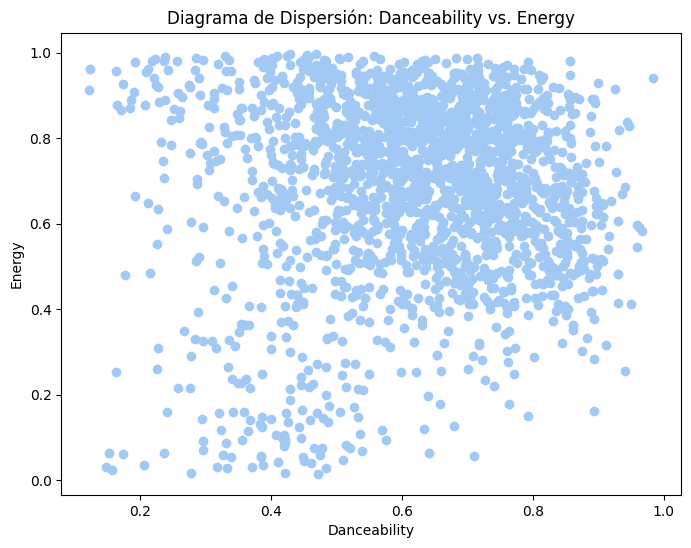

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['danceability'], df_2['energy'])
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Diagrama de Dispersión: Danceability vs. Energy')
plt.show()

Como influye el registro (tono) de la cancion entre las variables 'energy' y 'danceability'?

#Relación variables Danceability, Energy y Key.

<ipython-input-78-dd7016f774e8>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', df_2['key'].nunique())


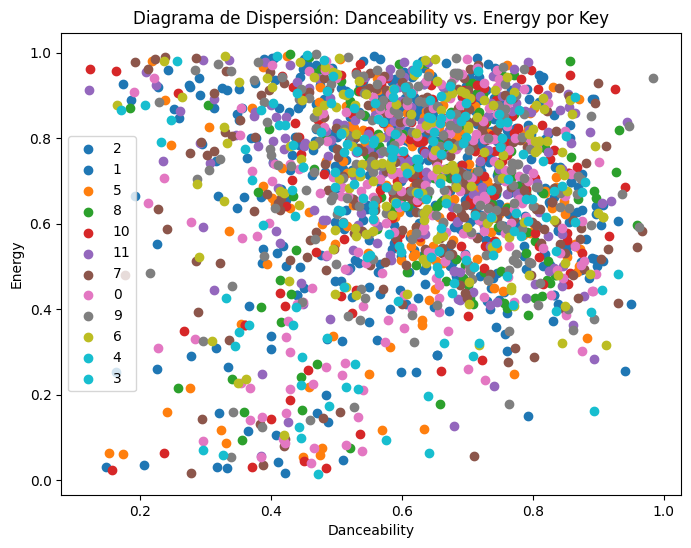

In [ ]:
import matplotlib.pyplot as plt

# Crea una lista de colores para cada valor único de 'key'
colores = plt.cm.get_cmap('tab10', df_2['key'].nunique())

plt.figure(figsize=(8, 6))
for i, key in enumerate(df_2['key'].unique()):
    df_key = df_2[df_2['key'] == key]
    plt.scatter(df_key['danceability'], df_key['energy'], color=colores(i), label=key)

plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Diagrama de Dispersión: Danceability vs. Energy por Key')
plt.legend()
plt.show()

Se advierte que no hay una influencia determinante de ningun registro, dado que en el grafico no hay ningun color preponderante que se destaque entre otros, y que nos permita identificar un tono en particular.

Si estás buscando identificar las variables más correlacionadas con tu variable objetivo después de realizar One-Hot Encoding, puedes usar la matriz de correlación corr_matrix que has calculado.

Aquí tienes un ejemplo de cómo puedes obtener las correlaciones con la variable objetivo (asumiendo que se llama 'target'):

In [ ]:
# Obtiene las correlaciones con la variable objetivo
target_correlations = corr_matrix['target'].sort_values(ascending=False)

# Imprime las correlaciones
print(target_correlations)



target              1.000000
danceability        0.176706
speechiness         0.154006
instrumentalness    0.152594
duration_min        0.146749
duration_ms         0.146749
valence             0.107930
time_signature      0.040182
energy              0.039688
tempo               0.034732
tempo_minutos       0.034732
key                 0.033594
liveness            0.026364
loudness           -0.072000
mode               -0.072336
acousticness       -0.129627
Unnamed: 0         -0.865969
Name: target, dtype: float64


Este código ordenará las correlaciones con la variable objetivo en orden descendente y las imprimirá. Las variables con las correlaciones más altas (positivas o negativas) son las que tienen mayor influencia en la variable objetivo.

Recuerda que la correlación no implica causalidad. Una alta correlación solo indica una fuerte relación lineal entre las variables, pero no necesariamente significa que una variable cause la otra.

In [ ]:
import pandas as pd

df = df_2.drop(columns=['song_title', 'artist'])

df_onehot = pd.get_dummies(df, drop_first=True)

df_onehot.shape

corr_matrix = df_onehot.corr()

corr_matrix.head

<bound method NDFrame.head of                   Unnamed: 0  acousticness  danceability  duration_ms  \
Unnamed: 0          1.000000      0.133055     -0.139615    -0.104185   
acousticness        0.133055      1.000000     -0.179894     0.071536   
danceability       -0.139615     -0.179894      1.000000     0.004695   
duration_ms        -0.104185      0.071536      0.004695     1.000000   
energy             -0.039880     -0.646319      0.038557    -0.144473   
instrumentalness   -0.104641      0.144397     -0.130561     0.305403   
key                -0.035611     -0.081037      0.022325     0.023570   
liveness           -0.039962     -0.117126     -0.132044     0.023203   
loudness            0.021935     -0.562021      0.104362    -0.273798   
mode                0.060639      0.068028     -0.047867    -0.074806   
speechiness        -0.135362     -0.099893      0.142661    -0.079562   
tempo              -0.027890     -0.127596     -0.143538    -0.076469   
time_signature     -0.053235     -0.190353      0.128909    -0.040157   
valence            -0.077812     -0.152227      0.442061    -0.120030   
target             -0.865969     -0.129627      0.176706     0.146749   
tempo_minutos      -0.027890     -0.127596     -0.143538    -0.076469   
duration_min       -0.104185      0.071536      0.004695     1.000000   

                    energy  instrumentalness       key  liveness  loudness  \
Unnamed: 0       -0.039880         -0.104641 -0.035611 -0.039962  0.021935   
acousticness     -0.646319          0.144397 -0.081037 -0.117126 -0.562021   
danceability      0.038557         -0.130561  0.022325 -0.132044  0.104362   
duration_ms      -0.144473          0.305403  0.023570  0.023203 -0.273798   
energy            1.000000         -0.122890  0.072886  0.217435  0.762177   
instrumentalness -0.122890          1.000000 -0.009640  0.001063 -0.354625   
key               0.072886         -0.009640  1.000000  0.049739  0.050929   
liveness          0.217435          0.001063  0.049739  1.000000  0.156648   
loudness          0.762177         -0.354625  0.050929  0.156648  1.000000   
mode             -0.070263         -0.030099 -0.195040 -0.018587 -0.044015   
speechiness       0.093102         -0.155349  0.019116  0.092403  0.088844   
tempo             0.165721          0.000347  0.040301  0.010558  0.156418   
time_signature    0.182895         -0.070721  0.024937  0.018199  0.143011   
valence           0.278383         -0.194630  0.032485 -0.053011  0.204968   
target            0.039688          0.152594  0.033594  0.026364 -0.072000   
tempo_minutos     0.165721          0.000347  0.040301  0.010558  0.156418   
duration_min     -0.144473          0.305403  0.023570  0.023203 -0.273798   

                      mode  speechiness     tempo  time_signature   valence  \
Unnamed: 0        0.060639    -0.135362 -0.027890       -0.053235 -0.077812   
acousticness      0.068028    -0.099893 -0.127596       -0.190353 -0.152227   
danceability     -0.047867     0.142661 -0.143538        0.128909  0.442061   
duration_ms      -0.074806    -0.079562 -0.076469       -0.040157 -0.120030   
energy           -0.070263     0.093102  0.165721        0.182895  0.278383   
instrumentalness -0.030099    -0.155349  0.000347       -0.070721 -0.194630   
key              -0.195040     0.019116  0.040301        0.024937  0.032485   
liveness         -0.018587     0.092403  0.010558        0.018199 -0.053011   
loudness         -0.044015     0.088844  0.156418        0.143011  0.204968   
mode              1.000000    -0.049398 -0.059995       -0.039038 -0.032879   
speechiness      -0.049398     1.000000  0.111359        0.113529  0.054419   
tempo            -0.059995     0.111359  1.000000       -0.055918 -0.014965   
time_signature   -0.039038     0.113529 -0.055918        1.000000  0.134722   
valence          -0.032879     0.054419 -0.014965        0.134722  1.000000   
target           -0.072336     0.154006  0.034732        0.040182

In [ ]:
# Imprime los tipos de datos de cada columna
print(df_2.dtypes)

# Filtra las columnas con tipo de datos 'object' (generalmente categóricas)
categorical_columns = df_2.select_dtypes(include=['object']).columns
print(categorical_columns)

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
tempo_minutos       float64
duration_min        float64
dtype: object
Index(['song_title', 'artist'], dtype='object')


In [ ]:
# Supongamos que 'categoria1' y 'categoria2' son variables categóricas en df_2
df_encoded = pd.get_dummies(df_2, columns=['song_title', 'artist'])

# Imprime el DataFrame codificado
print(df_encoded)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  ...  artist_alt-J  \
0             0.021900    2    0.1650    -8.795     1  ...         False   
1             0.006

#posibles nuevos analisis

Danceability vs.

acousticness: Explora si existe una relación inversa, es decir, si las canciones más bailables tienden a ser menos acústicas.

duration_ms: Analiza si la duración de una canción influye en su bailabilidad. ¿Las canciones más largas o más cortas tienden a ser más bailables?

instrumentalness: Observa si las canciones con mayor presencia de instrumentos (y menos voces) tienden a ser más o menos bailables.

key: Investiga si ciertas tonalidades musicales están asociadas con una mayor bailabilidad.

liveness: Explora si las canciones grabadas en vivo tienden a ser más o menos bailables que las grabadas en estudio.

loudness: Analiza si el volumen de una canción influye en su bailabilidad. ¿Las canciones más fuertes o más suaves tienden a ser más bailables?

mode: Compara la bailabilidad entre canciones en modo mayor y modo menor. ¿Existe alguna tendencia?

speechiness: Observa si las canciones con mayor contenido hablado tienden a ser menos bailables.

tempo: Analiza la relación entre el tempo (velocidad) de una canción y su bailabilidad. ¿Las canciones más rápidas o más lentas tienden a ser más bailables?

time_signature: Explora si el compás (time signature) de una canción influye en su bailabilidad.

valence: Investiga la relación entre la positividad (valence) de una canción y su bailabilidad. ¿Las canciones más alegres o más tristes tienden a ser más bailables?

target: Si 'target' representa alguna característica binaria (por ejemplo, éxito comercial), puedes comparar la bailabilidad entre las canciones que tienen target 0 y 1.


Recuerda que estas son solo sugerencias, y la mejor manera de explorar estas relaciones dependerá de tus objetivos de análisis y de las características específicas de tu dataset.

Puedes usar diferentes tipos de gráficos (diagramas de dispersión, histogramas, boxplots, etc.) y técnicas estadísticas para obtener insights más profundos.

¡Espero que esto te ayude a encontrar nuevas comparaciones interesantes!